In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [133]:
trn_data=pd.read_csv("C:\\Users\\USER\\Downloads\\customer_train.csv")
trn_data

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1675,1675,4712,1991,D3,Bertunangan,20193000.0,0,0,28-11-2012,...,4,0,0,0,0,0,0,3,11,0
1676,1676,1676,1170,1975,S1,Menikah,27573000.0,1,0,25-03-2013,...,8,0,0,0,0,0,0,3,11,0
1677,1677,1677,6347,1979,SMA,Lajang,15862000.0,1,0,27-06-2013,...,8,0,0,0,0,0,0,3,11,0
1678,1678,1678,4065,1976,S3,Menikah,49544000.0,1,0,12-02-2013,...,7,0,0,0,0,0,0,3,11,0


In [134]:
tst_data=pd.read_csv("C:\\Users\\USER\\Downloads\\customer_test.csv")
tst_data

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1681,1681,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,...,5,0,0,0,0,0,0,3,11,0
1,1682,1682,2156,1955,S3,Menikah,22554000.0,1,1,03-11-2012,...,5,0,0,0,0,0,0,3,11,0
2,1683,1683,7788,1983,S3,Menikah,23536000.0,1,0,04-06-2014,...,3,0,0,0,0,0,0,3,11,0
3,1684,1684,10323,1952,S1,Menikah,49413000.0,0,1,25-10-2013,...,5,0,0,0,0,0,0,3,11,0
4,1685,1685,7947,1969,S1,Menikah,42231000.0,1,1,25-03-2014,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,...,5,0,0,0,0,0,0,3,11,0
555,2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,...,7,0,0,0,1,0,0,3,11,0
556,2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,...,6,0,1,0,0,0,0,3,11,0
557,2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,...,3,0,0,0,0,0,0,3,11,0


## Exploratory Data Analysis

In [135]:
trn_data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [136]:
tst_data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1681,1681,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,...,5,0,0,0,0,0,0,3,11,0
1,1682,1682,2156,1955,S3,Menikah,22554000.0,1,1,03-11-2012,...,5,0,0,0,0,0,0,3,11,0
2,1683,1683,7788,1983,S3,Menikah,23536000.0,1,0,04-06-2014,...,3,0,0,0,0,0,0,3,11,0
3,1684,1684,10323,1952,S1,Menikah,49413000.0,0,1,25-10-2013,...,5,0,0,0,0,0,0,3,11,0
4,1685,1685,7947,1969,S1,Menikah,42231000.0,1,1,25-03-2014,...,5,0,0,0,0,0,0,3,11,0


In [137]:
trn_data.describe()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1680.000000,1680.000000,1680.000000,1680.000000,1.663000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.0,1680.0,1680.000000
mean,839.500000,839.500000,5551.728571,1968.847619,5.201434e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,...,5.332143,0.071429,0.074405,0.069048,0.062500,0.011905,0.010119,3.0,11.0,0.144048
std,485.118542,485.118542,3238.155703,12.027192,2.148248e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,...,2.449814,0.257616,0.262507,0.253611,0.242134,0.108490,0.100113,0.0,0.0,0.351243
min,0.000000,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,419.750000,419.750000,2823.250000,1960.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,839.500000,839.500000,5381.000000,1970.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1259.250000,1259.250000,8370.750000,1977.000000,6.812200e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1679.000000,1679.000000,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [138]:
tst_data.describe()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,559.000000,559.000000,559.000000,559.000000,5.520000e+02,559.000000,559.000000,559.000000,5.590000e+02,559.000000,...,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.0,559.0,559.000000
mean,1960.000000,1960.000000,5721.500894,1968.663685,5.291597e+07,0.420394,0.525939,49.187835,3.003488e+05,27293.381038,...,5.273703,0.076923,0.075134,0.084079,0.067979,0.017889,0.007156,3.0,11.0,0.164580
std,161.513673,161.513673,3269.336755,11.867607,3.397271e+07,0.511880,0.527682,29.109522,3.303610e+05,40361.180414,...,2.357450,0.266708,0.263844,0.277754,0.251935,0.132667,0.084363,0.0,0.0,0.371133
min,1681.000000,1681.000000,17.000000,1940.000000,4.023000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1820.500000,1820.500000,2850.500000,1958.500000,3.423900e+07,0.000000,0.000000,25.000000,2.300000e+04,2000.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1960.000000,1960.000000,5631.000000,1970.000000,5.246300e+07,0.000000,1.000000,49.000000,1.750000e+05,8000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,2099.500000,2099.500000,8603.500000,1977.000000,6.956550e+07,1.000000,1.000000,74.000000,5.140000e+05,35000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,2239.000000,11187.000000,1995.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,194000.000000,...,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [139]:
trn_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [140]:
tst_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [141]:
trn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1680 non-null   int64  
 1   Unnamed: 0           1680 non-null   int64  
 2   ID                   1680 non-null   int64  
 3   Year_Birth           1680 non-null   int64  
 4   Education            1680 non-null   object 
 5   Marital_Status       1680 non-null   object 
 6   Income               1663 non-null   float64
 7   Kidhome              1680 non-null   int64  
 8   Teenhome             1680 non-null   int64  
 9   Dt_Customer          1680 non-null   object 
 10  Recency              1680 non-null   int64  
 11  MntCoke              1680 non-null   int64  
 12  MntFruits            1680 non-null   int64  
 13  MntMeatProducts      1680 non-null   int64  
 14  MntFishProducts      1680 non-null   int64  
 15  MntSweetProducts     1680 non-null   i

In [142]:
tst_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         559 non-null    int64  
 1   Unnamed: 0           559 non-null    int64  
 2   ID                   559 non-null    int64  
 3   Year_Birth           559 non-null    int64  
 4   Education            559 non-null    object 
 5   Marital_Status       559 non-null    object 
 6   Income               552 non-null    float64
 7   Kidhome              559 non-null    int64  
 8   Teenhome             559 non-null    int64  
 9   Dt_Customer          559 non-null    object 
 10  Recency              559 non-null    int64  
 11  MntCoke              559 non-null    int64  
 12  MntFruits            559 non-null    int64  
 13  MntMeatProducts      559 non-null    int64  
 14  MntFishProducts      559 non-null    int64  
 15  MntSweetProducts     559 non-null    int

In [143]:
trn_data.isnull().sum()

Unnamed: 0.1            0
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [144]:
tst_data.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 7
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [145]:
#Remove unwanted columns
trn_data=trn_data.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis='columns')
trn_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,4712,1991,D3,Bertunangan,20193000.0,0,0,28-11-2012,18,8000,...,4,0,0,0,0,0,0,3,11,0
1676,1170,1975,S1,Menikah,27573000.0,1,0,25-03-2013,45,50000,...,8,0,0,0,0,0,0,3,11,0
1677,6347,1979,SMA,Lajang,15862000.0,1,0,27-06-2013,26,1000,...,8,0,0,0,0,0,0,3,11,0
1678,4065,1976,S3,Menikah,49544000.0,1,0,12-02-2013,0,308000,...,7,0,0,0,0,0,0,3,11,0


In [146]:
tst_data=tst_data.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis='columns')
tst_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,84,43000,...,5,0,0,0,0,0,0,3,11,0
1,2156,1955,S3,Menikah,22554000.0,1,1,03-11-2012,38,27000,...,5,0,0,0,0,0,0,3,11,0
2,7788,1983,S3,Menikah,23536000.0,1,0,04-06-2014,53,6000,...,3,0,0,0,0,0,0,3,11,0
3,10323,1952,S1,Menikah,49413000.0,0,1,25-10-2013,88,205000,...,5,0,0,0,0,0,0,3,11,0
4,7947,1969,S1,Menikah,42231000.0,1,1,25-03-2014,99,24000,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,...,5,0,0,0,0,0,0,3,11,0
555,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,...,7,0,0,0,1,0,0,3,11,0
556,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,...,6,0,1,0,0,0,0,3,11,0
557,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,...,3,0,0,0,0,0,0,3,11,0


In [147]:
#Replace null values.Find the outliers
q1=trn_data.Income.quantile(0.25)
q3=trn_data.Income.quantile(0.75)
iqr=q3-q1
print(iqr)

min=q1-1.5*iqr
max=q3+1.5*iqr
print("minimum : ",min,"\n","maximum : ",max)

32434000.0
minimum :  -12963000.0 
 maximum :  116773000.0


In [148]:
trn_data=trn_data[(trn_data.Income>min)&(trn_data.Income<max)]
trn_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,4712,1991,D3,Bertunangan,20193000.0,0,0,28-11-2012,18,8000,...,4,0,0,0,0,0,0,3,11,0
1676,1170,1975,S1,Menikah,27573000.0,1,0,25-03-2013,45,50000,...,8,0,0,0,0,0,0,3,11,0
1677,6347,1979,SMA,Lajang,15862000.0,1,0,27-06-2013,26,1000,...,8,0,0,0,0,0,0,3,11,0
1678,4065,1976,S3,Menikah,49544000.0,1,0,12-02-2013,0,308000,...,7,0,0,0,0,0,0,3,11,0


In [149]:
trn_median=trn_data.Income.median()
trn_median

51124000.0

In [150]:
trn_data['Income'].fillna(trn_median,inplace=True)
trn_data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [151]:
q1=tst_data.Income.quantile(0.25)
q3=tst_data.Income.quantile(0.75)
iqr=q3-q1
print(iqr)

min=q1-1.5*iqr
max=q3+1.5*iqr
print("minimum : ",min,"\n","maximum : ",max)

35326500.0
minimum :  -18750750.0 
 maximum :  122555250.0


In [152]:
tst_data=tst_data[(tst_data.Income>min)&(tst_data.Income<max)]
tst_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,84,43000,...,5,0,0,0,0,0,0,3,11,0
1,2156,1955,S3,Menikah,22554000.0,1,1,03-11-2012,38,27000,...,5,0,0,0,0,0,0,3,11,0
2,7788,1983,S3,Menikah,23536000.0,1,0,04-06-2014,53,6000,...,3,0,0,0,0,0,0,3,11,0
3,10323,1952,S1,Menikah,49413000.0,0,1,25-10-2013,88,205000,...,5,0,0,0,0,0,0,3,11,0
4,7947,1969,S1,Menikah,42231000.0,1,1,25-03-2014,99,24000,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,...,5,0,0,0,0,0,0,3,11,0
555,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,...,7,0,0,0,1,0,0,3,11,0
556,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,...,6,0,1,0,0,0,0,3,11,0
557,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,...,3,0,0,0,0,0,0,3,11,0


In [153]:
tst_median=tst_data.Income.median()
tst_median

52345500.0

In [154]:
tst_data['Income'].fillna(tst_median,inplace=True)
tst_data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [155]:
# converting dtype of Dt_Customer to dtype datetime

trn_data["Dt_Customer"] = pd.to_datetime(trn_data["Dt_Customer"],format='%d-%m-%Y')
trn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1657 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1657 non-null   int64         
 1   Year_Birth           1657 non-null   int64         
 2   Education            1657 non-null   object        
 3   Marital_Status       1657 non-null   object        
 4   Income               1657 non-null   float64       
 5   Kidhome              1657 non-null   int64         
 6   Teenhome             1657 non-null   int64         
 7   Dt_Customer          1657 non-null   datetime64[ns]
 8   Recency              1657 non-null   int64         
 9   MntCoke              1657 non-null   int64         
 10  MntFruits            1657 non-null   int64         
 11  MntMeatProducts      1657 non-null   int64         
 12  MntFishProducts      1657 non-null   int64         
 13  MntSweetProducts     1657 non-null   i

In [156]:
tst_data["Dt_Customer"] = pd.to_datetime(tst_data["Dt_Customer"],format='%d-%m-%Y')
tst_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 0 to 558
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   550 non-null    int64         
 1   Year_Birth           550 non-null    int64         
 2   Education            550 non-null    object        
 3   Marital_Status       550 non-null    object        
 4   Income               550 non-null    float64       
 5   Kidhome              550 non-null    int64         
 6   Teenhome             550 non-null    int64         
 7   Dt_Customer          550 non-null    datetime64[ns]
 8   Recency              550 non-null    int64         
 9   MntCoke              550 non-null    int64         
 10  MntFruits            550 non-null    int64         
 11  MntMeatProducts      550 non-null    int64         
 12  MntFishProducts      550 non-null    int64         
 13  MntSweetProducts     550 non-null    int

In [157]:
#create some new fatures by compaining other features
#Age of customer today 
trn_data["Age"] = 2023-trn_data["Year_Birth"]

#Total spendings on various items
trn_data["Spent"] = trn_data["MntCoke"]+ trn_data["MntFruits"]+ trn_data["MntMeatProducts"]+ trn_data["MntFishProducts"]+ trn_data["MntSweetProducts"]+ trn_data["MntGoldProds"]

#Feature indicating total children living in the household
trn_data["Children"]=trn_data["Kidhome"]+trn_data["Teenhome"]

trn_data['total_accptd_camp']=trn_data['AcceptedCmp1']+trn_data['AcceptedCmp2']+trn_data['AcceptedCmp3']+trn_data['Response']


In [158]:
tst_data["Age"] = 2023-tst_data["Year_Birth"]

#Total spendings on various items
tst_data["Spent"] = tst_data["MntCoke"]+ tst_data["MntFruits"]+ tst_data["MntMeatProducts"]+ tst_data["MntFishProducts"]+ tst_data["MntSweetProducts"]+ tst_data["MntGoldProds"]

#Feature indicating total children living in the household
tst_data["Children"]=tst_data["Kidhome"]+tst_data["Teenhome"]

tst_data['total_accptd_camp']=tst_data['AcceptedCmp1']+tst_data['AcceptedCmp2']+tst_data['AcceptedCmp3']+tst_data['Response']



In [159]:
#Remove outliers from column age
q1=trn_data.Age.quantile(0.25)
q3=trn_data.Age.quantile(0.75)
iqr=q3-q1
print(iqr)

min=q1-1.5*iqr
max=q3+1.5*iqr
print("minimum : ",min,"\n","maximum : ",max)

trn_data=trn_data[(trn_data.Age>min)&(trn_data.Age<max)]
trn_data

17.0
minimum :  20.5 
 maximum :  88.5


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Children,total_accptd_camp
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,...,0,0,0,3,11,1,66,1617000,0,1
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,...,0,0,0,3,11,0,69,27000,2,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,...,0,0,0,3,11,0,58,776000,0,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,...,0,0,0,3,11,0,39,53000,1,0
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,...,0,0,0,3,11,0,42,422000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,4712,1991,D3,Bertunangan,20193000.0,0,0,2012-11-28,18,8000,...,0,0,0,3,11,0,32,82000,0,0
1676,1170,1975,S1,Menikah,27573000.0,1,0,2013-03-25,45,50000,...,0,0,0,3,11,0,48,244000,1,0
1677,6347,1979,SMA,Lajang,15862000.0,1,0,2013-06-27,26,1000,...,0,0,0,3,11,0,44,36000,1,0
1678,4065,1976,S3,Menikah,49544000.0,1,0,2013-02-12,0,308000,...,0,0,0,3,11,0,47,404000,1,0


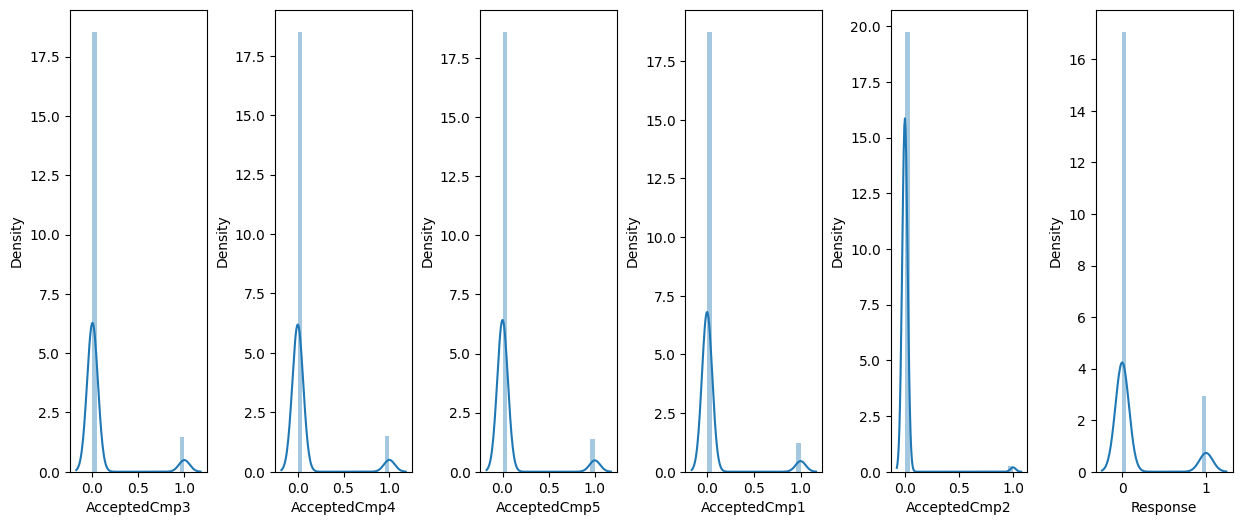

In [160]:
#promotion.finding through which promotion campion more people accept the offer

plt.figure(1,figsize=(15,6))
n=0
for x in [ 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2' ,'Response']:
    n+=1
    plt.subplot(1,6,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(trn_data[x],bins=20)
plt.show()

based on accepted campaign graph we can know that the more campaign done by the company the more people accept the campaign

In [161]:
#Total amount of each customer spent to buy each product in last 2 years

total=trn_data[[ 'MntCoke','MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']].aggregate('sum')
print(total) 

MntCoke             507977000
MntFruits            43031000
MntMeatProducts     271284000
MntFishProducts      61571000
MntSweetProducts     44791000
MntGoldProds         71792000
dtype: int64


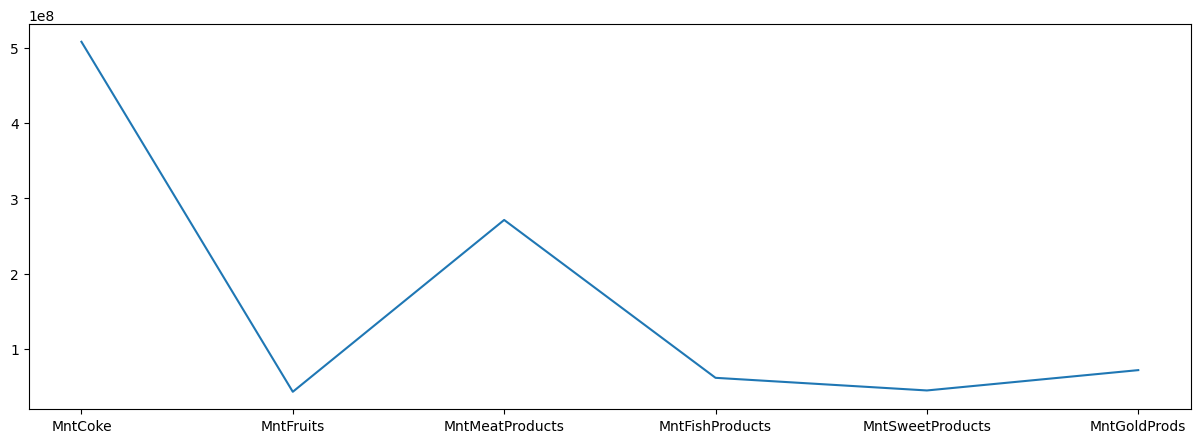

In [162]:
#Finding for which category of product customer spent more amount in last 2 years

plt.figure(figsize=(15,5))
plt.plot(total)
plt.show()

Frome the above plot we get an idea that the customer spend more amount in last 2 years is for coke and least amount spent for fruits

In [163]:
#finding most of customers choose which mode of shoping

order=trn_data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']].aggregate('sum')
print(order)

NumWebPurchases        6708
NumCatalogPurchases    4376
NumStorePurchases      9631
NumWebVisitsMonth      8854
dtype: int64


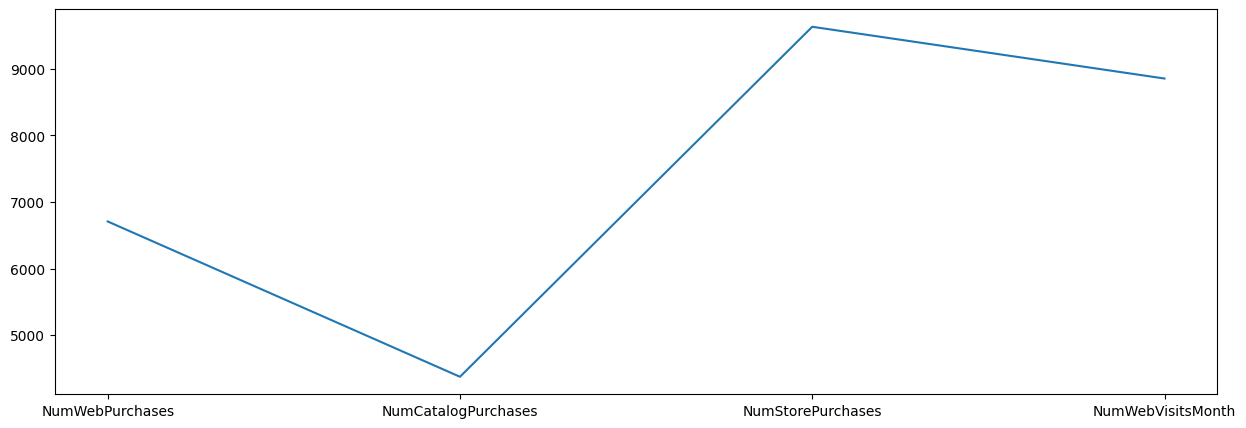

In [164]:
plt.figure(figsize=(15,5))
plt.plot(order)
plt.show()

from the above plot we get that most of the people chooses to purchase directly from the shope and leat people purchases made using a catalogue



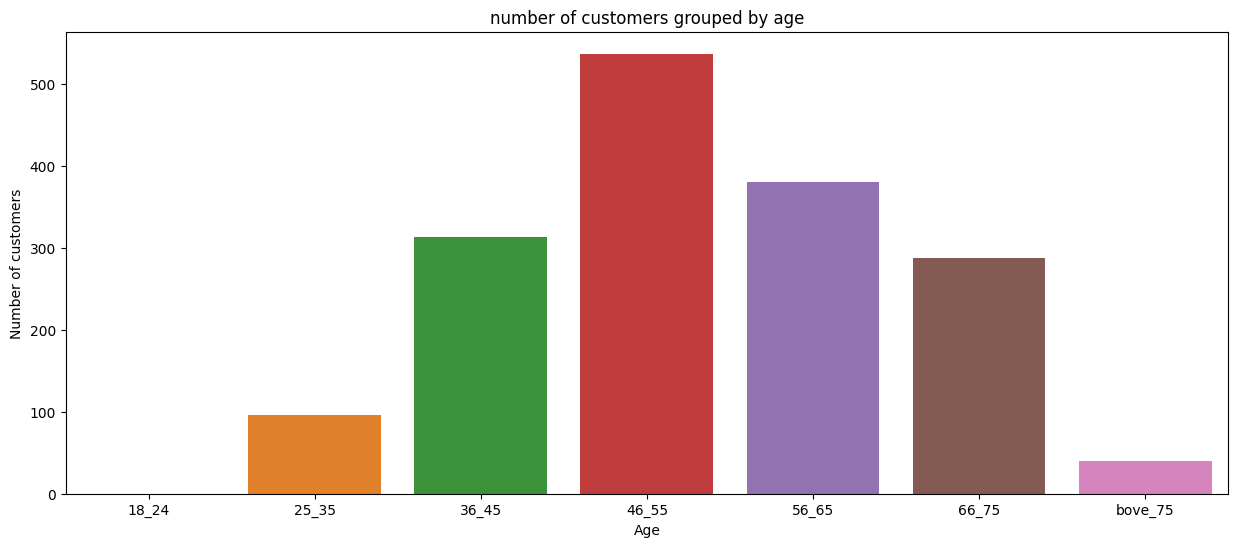

In [165]:
#Find out the number of customers in each age group
age_18_24=trn_data[(trn_data.Age>=18)&(trn_data.Age<=24)]
age_25_35=trn_data[(trn_data.Age>=25)&(trn_data.Age<=35)]
age_36_45=trn_data[(trn_data.Age>=36)&(trn_data.Age<=45)]
age_46_55=trn_data[(trn_data.Age>=46)&(trn_data.Age<=55)]
age_56_65=trn_data[(trn_data.Age>=56)&(trn_data.Age<=65)]
age_66_75=trn_data[(trn_data.Age>=66)&(trn_data.Age<=75)]
age_75above=trn_data[(trn_data.Age>=76)]
age_x=["18_24","25_35","36_45","46_55","56_65","66_75","bove_75",]

age_y=[len(age_18_24.values),len(age_25_35.values),len(age_36_45.values),len(age_46_55.values),len(age_56_65.values),len(age_66_75.values),len(age_75above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=age_x,y=age_y)
plt.title("number of customers grouped by age")
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.show()

From the plot we can find out that most of the customers are in age group 46_55. And all of them have age above 24

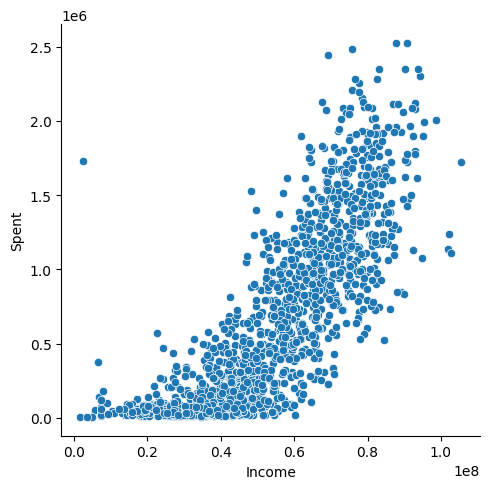

In [166]:
#Finding out relationship between annual income and spending amount

sns.relplot(x="Income",y="Spent",data=trn_data)
plt.show()

From the plot it's clear that there is relationship between annual income and their spenting amount

In [167]:
#T0 categorise customers by their income first we need the minimum and maximum income

print(trn_data["Income"].min(axis=0))
print(trn_data["Income"].max(axis=0))

1730000.0
105471000.0


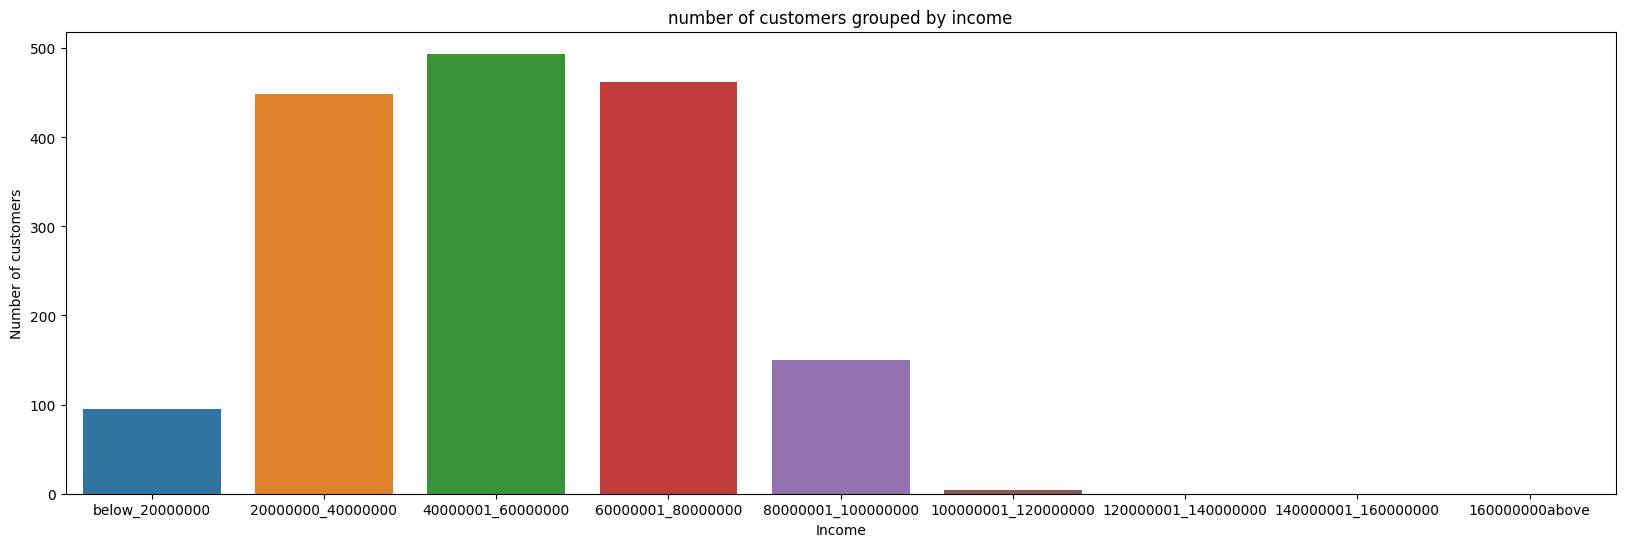

In [170]:
#Categorise customers by their income

below_20000000=trn_data["Income"][(trn_data["Income"]<20000000)]
incm_20000000_40000000=trn_data["Income"][(trn_data["Income"]>=20000000)&(trn_data["Income"]<=40000000)]
incm_40000001_60000000=trn_data["Income"][(trn_data["Income"]>40000001)&(trn_data["Income"]<=60000001)]
incm_60000001_80000000=trn_data["Income"][(trn_data["Income"]>60000001)&(trn_data["Income"]<=80000001)]
incm_80000001_100000000=trn_data["Income"][(trn_data["Income"]>80000001)&(trn_data["Income"]<=100000000)]
incm_100000001_120000000=trn_data["Income"][(trn_data["Income"]>100000001)&(trn_data["Income"]<=120000000)]
incm_120000001_140000000=trn_data["Income"][(trn_data["Income"]>120000001)&(trn_data["Income"]<=140000000)]
incm_140000001_160000000=trn_data["Income"][(trn_data["Income"]>140000001)&(trn_data["Income"]<=160000000)]
incm_160000000above=trn_data["Income"][(trn_data["Income"]>160000000)]
                                                           
incm_x=["below_20000000","20000000_40000000","40000001_60000000","60000001_80000000","80000001_100000000","100000001_120000000","120000001_140000000","140000001_160000000","160000000above"]
incm_y=[len(below_20000000.values),len(incm_20000000_40000000.values),len(incm_40000001_60000000.values),len(incm_60000001_80000000.values),len(incm_80000001_100000000.values),len(incm_100000001_120000000.values),len(incm_120000001_140000000.values),len(incm_140000001_160000000.values),len(incm_160000000above.values)]

plt.figure(figsize=(20,6))
sns.barplot(x=incm_x,y=incm_y)
plt.title("number of customers grouped by income")
plt.xlabel("Income")
plt.ylabel("Number of customers")
plt.show()

In [171]:
#Dropping some of the redundant features
to_drop = [ "Year_Birth", "Kidhome","Teenhome","Z_CostContact", "Z_Revenue","ID"]
trn_data =trn_data.drop(to_drop, axis=1)
tst_data = tst_data.drop(to_drop, axis=1)

In [172]:
dtyp= (trn_data.dtypes == 'object')
dtyp_obj = list(dtyp[dtyp].index)
dtyp_obj
lbl_encdr=LabelEncoder()
for i in dtyp_obj:
    trn_data[i]=trn_data[[i]].apply(lbl_encdr.fit_transform)
trn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1654 entries, 0 to 1679
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            1654 non-null   int32         
 1   Marital_Status       1654 non-null   int32         
 2   Income               1654 non-null   float64       
 3   Dt_Customer          1654 non-null   datetime64[ns]
 4   Recency              1654 non-null   int64         
 5   MntCoke              1654 non-null   int64         
 6   MntFruits            1654 non-null   int64         
 7   MntMeatProducts      1654 non-null   int64         
 8   MntFishProducts      1654 non-null   int64         
 9   MntSweetProducts     1654 non-null   int64         
 10  MntGoldProds         1654 non-null   int64         
 11  NumDealsPurchases    1654 non-null   int64         
 12  NumWebPurchases      1654 non-null   int64         
 13  NumCatalogPurchases  1654 non-null   i

In [173]:
dtyp= (trn_data.dtypes == 'datetime64[ns]')
dtyp_obj = list(dtyp[dtyp].index)
dtyp_obj
lbl_encdr=LabelEncoder()
for i in dtyp_obj:
    trn_data[i]=trn_data[[i]].apply(lbl_encdr.fit_transform)
trn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1654 entries, 0 to 1679
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1654 non-null   int32  
 1   Marital_Status       1654 non-null   int32  
 2   Income               1654 non-null   float64
 3   Dt_Customer          1654 non-null   int64  
 4   Recency              1654 non-null   int64  
 5   MntCoke              1654 non-null   int64  
 6   MntFruits            1654 non-null   int64  
 7   MntMeatProducts      1654 non-null   int64  
 8   MntFishProducts      1654 non-null   int64  
 9   MntSweetProducts     1654 non-null   int64  
 10  MntGoldProds         1654 non-null   int64  
 11  NumDealsPurchases    1654 non-null   int64  
 12  NumWebPurchases      1654 non-null   int64  
 13  NumCatalogPurchases  1654 non-null   int64  
 14  NumStorePurchases    1654 non-null   int64  
 15  NumWebVisitsMonth    1654 non-null   int64 

In [174]:
dtyp= (tst_data.dtypes == 'object')
dtyp_obj = list(dtyp[dtyp].index)
dtyp_obj
lbl_encdr=LabelEncoder()
for i in dtyp_obj:
    tst_data[i]=tst_data[[i]].apply(lbl_encdr.fit_transform)
tst_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 0 to 558
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            550 non-null    int32         
 1   Marital_Status       550 non-null    int32         
 2   Income               550 non-null    float64       
 3   Dt_Customer          550 non-null    datetime64[ns]
 4   Recency              550 non-null    int64         
 5   MntCoke              550 non-null    int64         
 6   MntFruits            550 non-null    int64         
 7   MntMeatProducts      550 non-null    int64         
 8   MntFishProducts      550 non-null    int64         
 9   MntSweetProducts     550 non-null    int64         
 10  MntGoldProds         550 non-null    int64         
 11  NumDealsPurchases    550 non-null    int64         
 12  NumWebPurchases      550 non-null    int64         
 13  NumCatalogPurchases  550 non-null    int

In [175]:
dtyp= (tst_data.dtypes == 'datetime64[ns]')
dtyp_obj = list(dtyp[dtyp].index)
dtyp_obj
lbl_encdr=LabelEncoder()
for i in dtyp_obj:
    tst_data[i]=tst_data[[i]].apply(lbl_encdr.fit_transform)
tst_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 0 to 558
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            550 non-null    int32  
 1   Marital_Status       550 non-null    int32  
 2   Income               550 non-null    float64
 3   Dt_Customer          550 non-null    int64  
 4   Recency              550 non-null    int64  
 5   MntCoke              550 non-null    int64  
 6   MntFruits            550 non-null    int64  
 7   MntMeatProducts      550 non-null    int64  
 8   MntFishProducts      550 non-null    int64  
 9   MntSweetProducts     550 non-null    int64  
 10  MntGoldProds         550 non-null    int64  
 11  NumDealsPurchases    550 non-null    int64  
 12  NumWebPurchases      550 non-null    int64  
 13  NumCatalogPurchases  550 non-null    int64  
 14  NumStorePurchases    550 non-null    int64  
 15  NumWebVisitsMonth    550 non-null    int64  


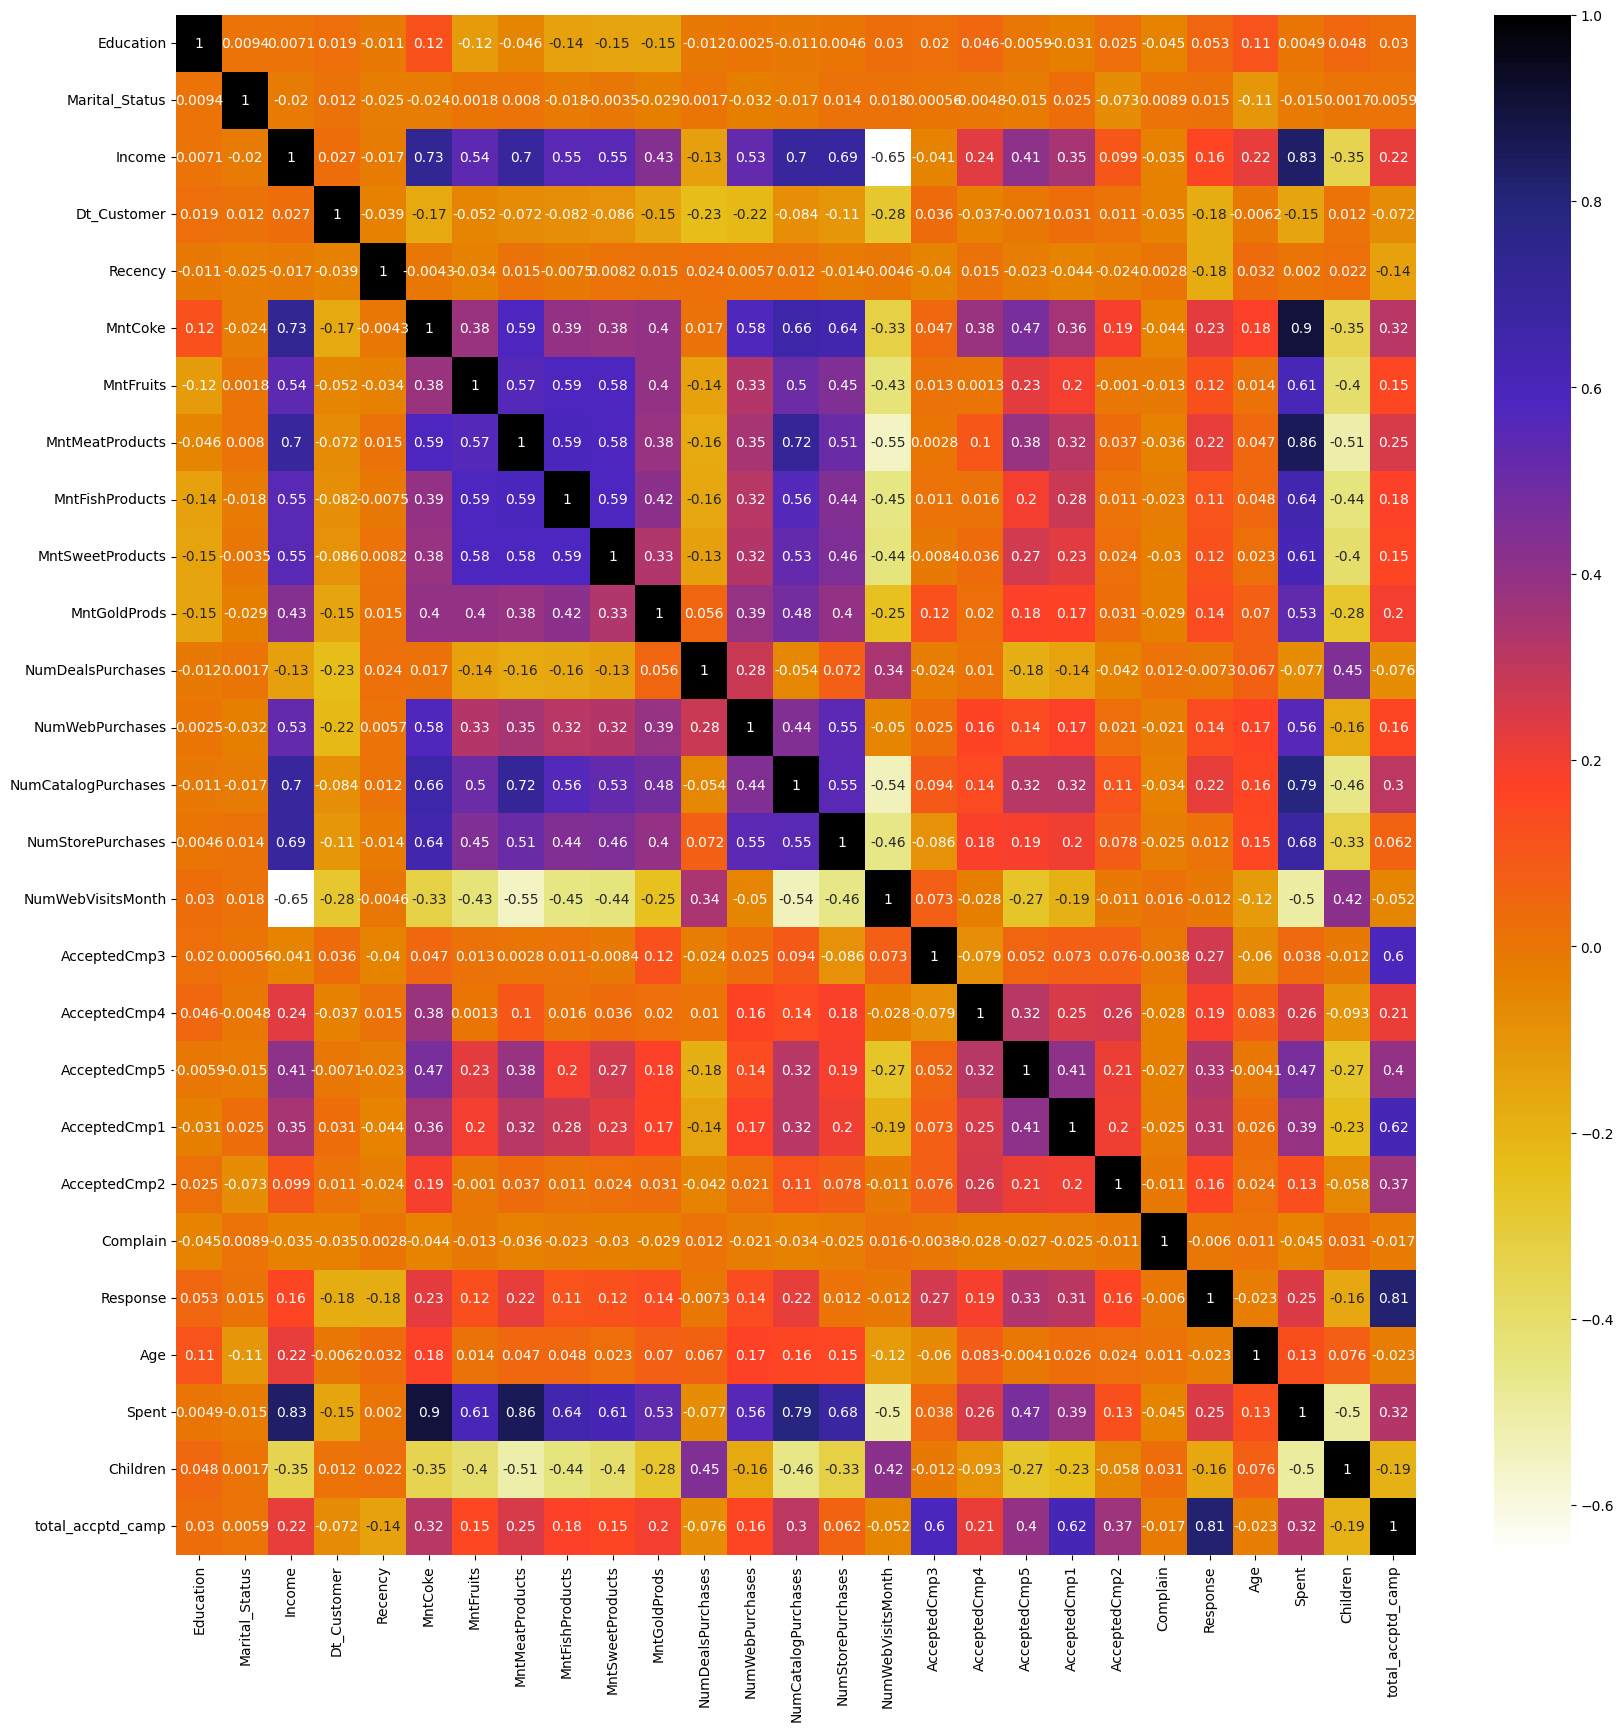

In [176]:
plt.figure(figsize=(20,20))
cor=trn_data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [177]:
def correlation(dataset,threshold):
    col_corr=set()#set of all the names of correlated features
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [178]:
corr_features=correlation(trn_data,0.2)
corr_features

{'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Age',
 'Children',
 'MntCoke',
 'MntFishProducts',
 'MntFruits',
 'MntGoldProds',
 'MntMeatProducts',
 'MntSweetProducts',
 'NumCatalogPurchases',
 'NumDealsPurchases',
 'NumStorePurchases',
 'NumWebPurchases',
 'NumWebVisitsMonth',
 'Response',
 'Spent',
 'total_accptd_camp'}

In [179]:
copy_data_trn= trn_data.copy()
to_drop = ['Education','Marital_Status','Dt_Customer','Recency','Complain']
copy_data_trn =trn_data.drop(to_drop, axis=1)
copy_data_trn

,Income,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Spent,Children,total_accptd_camp
0,58138000.0,635000,88000,546000,172000,88000,88000,3,8,10,...,0,0,0,0,0,1,66,1617000,0,1
1,46344000.0,11000,1000,6000,2000,1000,6000,2,1,1,...,0,0,0,0,0,0,69,27000,2,0
2,71613000.0,426000,49000,127000,111000,21000,42000,1,8,2,...,0,0,0,0,0,0,58,776000,0,0
3,26646000.0,11000,4000,20000,10000,3000,5000,2,2,0,...,0,0,0,0,0,0,39,53000,1,0
4,58293000.0,173000,43000,118000,46000,27000,15000,5,5,3,...,0,0,0,0,0,0,42,422000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,20193000.0,8000,8000,22000,24000,11000,9000,1,1,1,...,0,0,0,0,0,0,32,82000,0,0
1676,27573000.0,50000,15000,110000,39000,15000,15000,4,5,1,...,0,0,0,0,0,0,48,244000,1,0
1677,15862000.0,1000,1000,4000,11000,9000,10000,1,1,0,...,0,0,0,0,0,0,44,36000,1,0
1678,49544000.0,308000,0,73000,0,0,23000,2,5,1,...,0,0,0,0,0,0,47,404000,1,0


In [180]:
copy_data_tst= tst_data.copy()
to_drop = ['Education','Marital_Status','Dt_Customer','Recency','Complain']
copy_data_tst= tst_data.drop(to_drop, axis=1)
copy_data_tst

,Income,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Spent,Children,total_accptd_camp
0,38232000.0,43000,5000,28000,7000,6000,33000,4,3,1,...,0,0,0,0,0,0,52,122000,2,0
1,22554000.0,27000,0,10000,0,0,4000,4,2,0,...,0,0,0,0,0,0,68,41000,2,0
2,23536000.0,6000,0,3000,0,0,1000,1,0,0,...,0,0,0,0,0,0,40,10000,1,0
3,49413000.0,205000,7000,41000,3000,2000,46000,2,4,2,...,0,0,0,0,0,0,71,304000,1,0
4,42231000.0,24000,0,8000,0,1000,4000,1,1,0,...,0,0,0,0,0,0,54,37000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,61223000.0,709000,43000,182000,42000,118000,247000,2,9,3,...,0,0,0,0,0,0,56,1341000,1,0
555,64014000.0,406000,0,30000,0,0,8000,7,8,2,...,0,0,0,1,0,0,77,444000,3,1
556,56981000.0,908000,48000,217000,32000,12000,24000,1,2,3,...,0,1,0,0,0,0,42,1241000,0,0
557,69245000.0,428000,30000,214000,80000,30000,61000,2,6,5,...,0,0,0,0,0,0,67,843000,1,0


In [181]:
scaler = StandardScaler()
scaler.fit(copy_data_trn)
scaled_trn_data = pd.DataFrame(scaler.transform(copy_data_trn),columns= copy_data_trn.columns )
print("All features are now scaled")


scaled_trn_data.head()

All features are now scaled


,Income,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Spent,Children,total_accptd_camp
0,0.317619,0.966272,1.567917,1.767897,2.477115,1.474157,0.878503,0.350721,1.510742,2.616962,...,-0.279691,-0.283442,-0.273357,-0.257699,-0.110634,2.415515,1.024745,1.684471,-1.250099,1.116505
1,-0.256606,-0.872676,-0.632804,-0.731335,-0.647434,-0.631104,-0.736866,-0.173775,-1.170338,-0.585611,...,-0.279691,-0.283442,-0.273357,-0.257699,-0.110634,-0.413990,1.281916,-0.961725,1.382191,-0.463221
2,0.973689,0.350342,0.581387,-0.171322,1.355953,-0.147136,-0.027680,-0.698271,1.510742,-0.229769,...,-0.279691,-0.283442,-0.273357,-0.257699,-0.110634,-0.413990,0.338956,0.284816,-1.250099,-0.463221
3,-1.215660,-0.872676,-0.556917,-0.666540,-0.500397,-0.582707,-0.756565,-0.173775,-0.787327,-0.941452,...,-0.279691,-0.283442,-0.273357,-0.257699,-0.110634,-0.413990,-1.289794,-0.918454,0.066046,-0.463221
4,0.325166,-0.395257,0.429613,-0.212976,0.161272,-0.001946,-0.559569,1.399714,0.361707,0.126072,...,-0.279691,-0.283442,-0.273357,-0.257699,-0.110634,-0.413990,-1.032623,-0.304337,0.066046,-0.463221


In [182]:
scaler = StandardScaler()
scaler.fit(copy_data_tst)
scaled_tst_data = pd.DataFrame(scaler.transform(copy_data_tst),columns= copy_data_tst.columns )
print("All features are now scaled")


scaled_tst_data.head()

All features are now scaled


,Income,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Spent,Children,total_accptd_camp
0,-0.630702,-0.783083,-0.555458,-0.632247,-0.576419,-0.523000,-0.237469,0.943151,-0.400473,-0.594008,...,-0.291226,-0.283813,-0.302109,-0.272431,-0.136083,-0.445261,-0.191377,-0.811289,1.471568,-0.499097
1,-1.369785,-0.831349,-0.679434,-0.713189,-0.701403,-0.671465,-0.769738,0.943151,-0.724861,-0.958228,...,-0.291226,-0.283813,-0.302109,-0.272431,-0.136083,-0.445261,1.162415,-0.945687,1.471568,-0.499097
2,-1.323492,-0.894697,-0.679434,-0.744666,-0.701403,-0.671465,-0.824800,-0.703620,-1.373639,-0.958228,...,-0.291226,-0.283813,-0.302109,-0.272431,-0.136083,-0.445261,-1.206721,-0.997124,0.073705,-0.499097
3,-0.103615,-0.294397,-0.505867,-0.573789,-0.647838,-0.621976,0.001135,-0.154697,-0.076084,-0.229789,...,-0.291226,-0.283813,-0.302109,-0.272431,-0.136083,-0.445261,1.416251,-0.509308,0.073705,-0.499097
4,-0.442184,-0.840398,-0.679434,-0.722183,-0.701403,-0.646720,-0.769738,-0.703620,-1.049250,-0.958228,...,-0.291226,-0.283813,-0.302109,-0.272431,-0.136083,-0.445261,-0.022153,-0.952324,1.471568,-0.499097


In [183]:
#apply classification algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [184]:
scaled_trn_data["total_accptd_camp"] =trn_data["total_accptd_camp"]
scaled_trn_data["total_accptd_camp"].unique()

array([ 1.,  0., nan,  2.,  3.,  4.])

In [185]:
scaled_trn_data = scaled_trn_data.dropna()

In [186]:
target = ["total_accptd_camp"]
x_train = scaled_trn_data.drop(target, axis=1)
y_train = scaled_trn_data[target]

In [187]:
x_train

,Income,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Spent,Children
0,0.317619,0.966272,1.567917,1.767897,2.477115,1.474157,0.878503,0.350721,1.510742,2.616962,...,0.675840,-0.279691,-0.283442,-0.273357,-0.257699,-0.110634,2.415515,1.024745,1.684471,-1.250099
1,-0.256606,-0.872676,-0.632804,-0.731335,-0.647434,-0.631104,-0.736866,-0.173775,-1.170338,-0.585611,...,-0.144894,-0.279691,-0.283442,-0.273357,-0.257699,-0.110634,-0.413990,1.281916,-0.961725,1.382191
2,0.973689,0.350342,0.581387,-0.171322,1.355953,-0.147136,-0.027680,-0.698271,1.510742,-0.229769,...,-0.555261,-0.279691,-0.283442,-0.273357,-0.257699,-0.110634,-0.413990,0.338956,0.284816,-1.250099
3,-1.215660,-0.872676,-0.556917,-0.666540,-0.500397,-0.582707,-0.756565,-0.173775,-0.787327,-0.941452,...,0.265473,-0.279691,-0.283442,-0.273357,-0.257699,-0.110634,-0.413990,-1.289794,-0.918454,0.066046
4,0.325166,-0.395257,0.429613,-0.212976,0.161272,-0.001946,-0.559569,1.399714,0.361707,0.126072,...,-0.144894,-0.279691,-0.283442,-0.273357,-0.257699,-0.110634,-0.413990,-1.032623,-0.304337,0.066046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,0.847246,1.234452,0.682569,0.920935,1.576509,1.933926,2.316575,0.875218,1.510742,2.261121,...,-0.144894,-0.279691,-0.283442,-0.273357,-0.257699,-0.110634,-0.413990,-0.089663,1.544672,0.066046
1649,-1.529843,-0.881517,-0.455734,-0.657284,-0.243081,-0.389120,-0.677767,-0.698271,-1.170338,-0.585611,...,-0.555261,-0.279691,-0.283442,-0.273357,-0.257699,-0.110634,-0.413990,-1.889860,-0.870190,-1.250099
1650,-1.170526,-0.757742,-0.278665,-0.250002,0.032615,-0.292327,-0.559569,0.875218,0.361707,-0.585611,...,1.086207,-0.279691,-0.283442,-0.273357,-0.257699,-0.110634,-0.413990,-0.518281,-0.600578,0.066046
1651,-1.740710,-0.902146,-0.632804,-0.740592,-0.482017,-0.437517,-0.658067,-0.698271,-1.170338,-0.941452,...,1.086207,-0.279691,-0.283442,-0.273357,-0.257699,-0.110634,-0.413990,-0.861176,-0.946747,0.066046


In [188]:
y_train

,total_accptd_camp
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1648,1.0
1649,0.0
1650,0.0
1651,1.0


In [189]:
scaled_tst_data["total_accptd_camp"] =tst_data["total_accptd_camp"]
scaled_tst_data=scaled_tst_data.dropna()

In [190]:
target = ["total_accptd_camp"]
x_test = scaled_tst_data.drop(target, axis=1)
y_test = scaled_tst_data[target]

In [191]:
x_test

,Income,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Spent,Children
0,-0.630702,-0.783083,-0.555458,-0.632247,-0.576419,-0.523000,-0.237469,0.943151,-0.400473,-0.594008,...,-0.125133,-0.291226,-0.283813,-0.302109,-0.272431,-0.136083,-0.445261,-0.191377,-0.811289,1.471568
1,-1.369785,-0.831349,-0.679434,-0.713189,-0.701403,-0.671465,-0.769738,0.943151,-0.724861,-0.958228,...,-0.125133,-0.291226,-0.283813,-0.302109,-0.272431,-0.136083,-0.445261,1.162415,-0.945687,1.471568
2,-1.323492,-0.894697,-0.679434,-0.744666,-0.701403,-0.671465,-0.824800,-0.703620,-1.373639,-0.958228,...,-0.980076,-0.291226,-0.283813,-0.302109,-0.272431,-0.136083,-0.445261,-1.206721,-0.997124,0.073705
3,-0.103615,-0.294397,-0.505867,-0.573789,-0.647838,-0.621976,0.001135,-0.154697,-0.076084,-0.229789,...,-0.125133,-0.291226,-0.283813,-0.302109,-0.272431,-0.136083,-0.445261,1.416251,-0.509308,0.073705
4,-0.442184,-0.840398,-0.679434,-0.722183,-0.701403,-0.646720,-0.769738,-0.703620,-1.049250,-0.958228,...,-0.125133,-0.291226,-0.283813,-0.302109,-0.272431,-0.136083,-0.445261,-0.022153,-0.952324,1.471568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,-0.810358,-0.903747,-0.605048,-0.726679,-0.594274,-0.621976,-0.677967,-0.703620,-1.049250,-0.958228,...,0.729811,-0.291226,-0.283813,-0.302109,-0.272431,-0.136083,-0.445261,-0.445213,-0.963939,0.073705
545,0.453125,1.225962,0.386760,0.060257,0.048500,2.248338,3.690310,-0.154697,1.545860,0.134430,...,-0.125133,-0.291226,-0.283813,-0.302109,-0.272431,-0.136083,-0.445261,0.147071,1.211322,0.073705
546,0.584697,0.311937,-0.679434,-0.623253,-0.701403,-0.671465,-0.696321,2.589922,1.221471,-0.229789,...,0.729811,-0.291226,-0.283813,-0.302109,3.670652,-0.136083,-0.445261,1.923923,-0.277014,2.869431
548,0.831293,0.378302,0.064422,0.204154,0.726984,0.070858,0.276446,-0.154697,0.572694,0.862868,...,-0.980076,-0.291226,-0.283813,-0.302109,-0.272431,-0.136083,-0.445261,1.077803,0.385022,0.073705


In [192]:
y_test

,total_accptd_camp
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
544,0.0
545,0.0
546,0.0
548,0.0


In [193]:
#logistic regression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [194]:
model.score(x_train,y_train)

0.7899262899262899

In [195]:
model=LogisticRegression()
model.fit(x_test,y_test)

LogisticRegression()

In [196]:
y_predicted=model.predict(x_test)

In [197]:
model.score(x_test,y_test)

0.8487084870848709

In [198]:
#support vector machine
from sklearn.svm import SVC
model=SVC()

In [199]:
model.fit(x_train,y_train)

SVC()

In [200]:
model.score(x_train,y_train)

0.7911547911547911

In [201]:
model.fit(x_test,y_test)

SVC()

In [202]:
model.score(x_test,y_test)

0.9188191881918819

In [203]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()


In [204]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [205]:
predict=DT.predict(x_test)

In [206]:
DT.score(x_train,y_train)

0.976044226044226

In [207]:
DT.score(x_test,y_test)

0.6236162361623616

In [208]:
#random forest
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()

In [209]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [210]:
RF.score(x_train,y_train)

0.976044226044226

In [211]:
RF.fit(x_test,y_test)

RandomForestClassifier()

In [212]:
RF.score(x_test,y_test)

0.9944649446494465

In [213]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc=accuracy_score(y_test,predict)
print('accuracy score : ',acc)

accuracy score :  0.6236162361623616


In [214]:
con=confusion_matrix(y_test,predict)
con

array([[322,  60,  26,   2,   0],
       [ 75,  15,   4,   0,   0],
       [ 26,   2,   1,   1,   0],
       [  3,   1,   2,   0,   0],
       [  2,   0,   0,   0,   0]], dtype=int64)

we get accuracy of 0.62

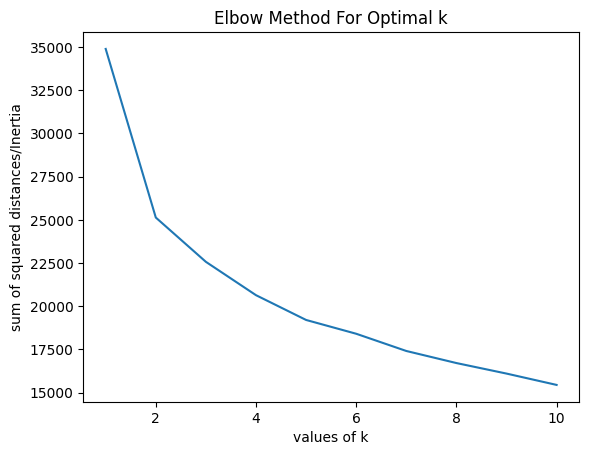

In [215]:
#clustering

sum_of_squared_distances=[]
k=range(1,11)
for num_clusters in k:
    kmeans=KMeans(n_clusters=num_clusters,init='k-means++')
    kmeans.fit(scaled_trn_data)
    sum_of_squared_distances.append(kmeans.inertia_)#gives wcss value of each cluster
plt.plot(k,sum_of_squared_distances)
plt.xlabel('values of k')
plt.ylabel('sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [216]:
score = silhouette_score(scaled_trn_data, kmeans.labels_, metric='euclidean')
score

0.13426550503099416

In [217]:
kmeans=KMeans(n_clusters=2,init='k-means++')
y=kmeans.fit_predict(scaled_trn_data)
labels=kmeans.labels_
print(labels)

[0 1 0 ... 1 1 1]


In [218]:
print(kmeans.cluster_centers_)

[[ 0.98677948  0.92818693  0.76557951  0.93289444  0.78515293  0.77569394
   0.62615874 -0.21573479  0.62460634  0.96984321  0.88544228 -0.7121848
   0.01021057  0.21662565  0.43747329  0.38454894  0.15286976  0.21529146
   0.1658625   1.08735095 -0.64361921  0.2912    ]
 [-0.61078859 -0.57776428 -0.47452332 -0.57690171 -0.48936528 -0.47915852
  -0.38545446  0.1410273  -0.38827721 -0.60264018 -0.54854179  0.43772077
  -0.00679939 -0.13903889 -0.27335663 -0.24119572 -0.09238994 -0.13752835
  -0.10940554 -0.67478154  0.40197119  0.29411765]]


In [219]:
km_eans=KMeans(n_clusters=2,init='k-means++')
y=km_eans.fit_predict(scaled_tst_data)
la_bels=km_eans.labels_
print(labels)

[0 1 0 ... 1 1 1]


Text(0.5, 1.0, 'Distribution Of The Clusters for train data')

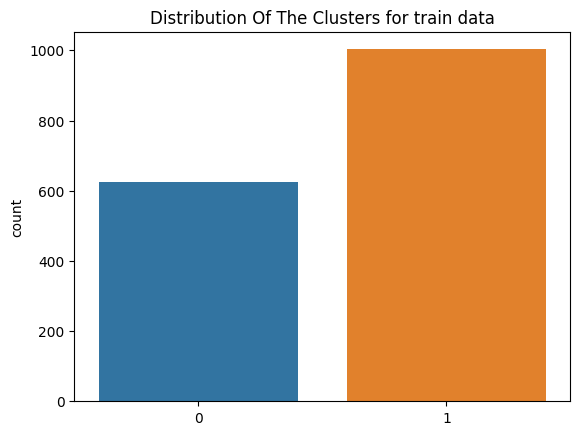

In [220]:
pl = sns.countplot(x=kmeans.labels_)
pl.set_title("Distribution Of The Clusters for train data")

Text(0.5, 1.0, 'Distribution Of The Clusters for test data')

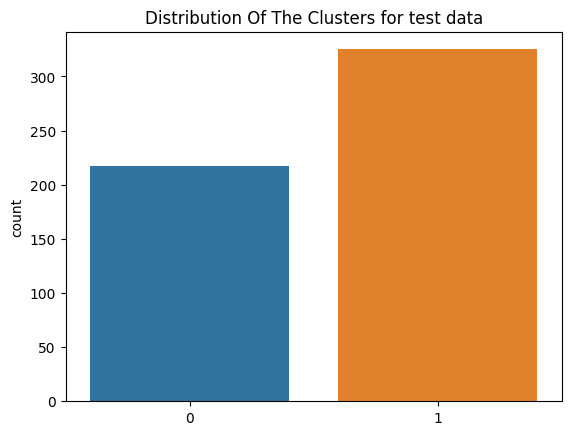

In [221]:
pl = sns.countplot(x=km_eans.labels_)
pl.set_title("Distribution Of The Clusters for test data")

clusters are fairly distributed

<Axes: xlabel='Income', ylabel='Spent'>

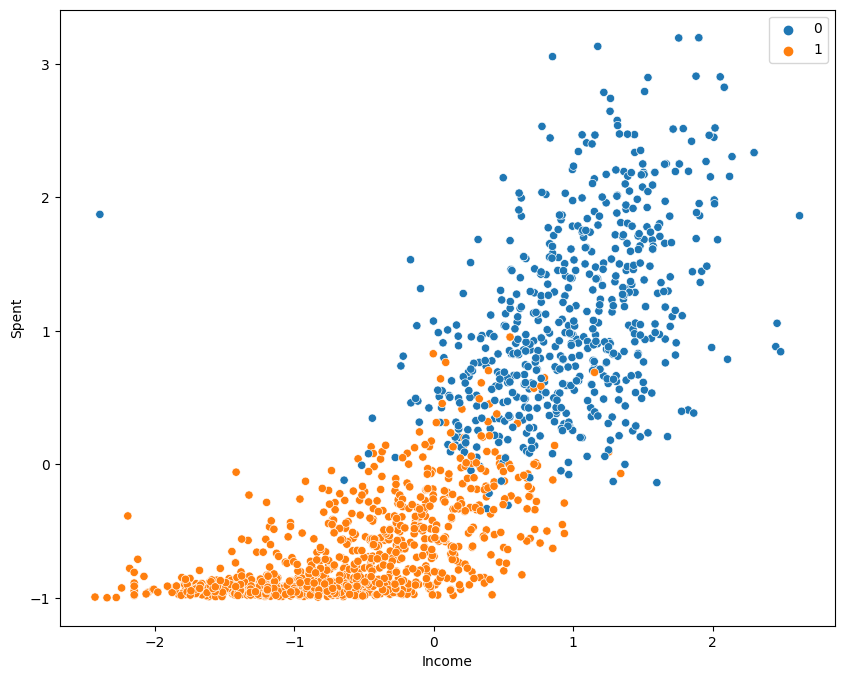

In [222]:
plt.figure(figsize=(10,8))
sns.scatterplot(data =scaled_trn_data, x = 'Income', y = 'Spent', hue = kmeans.labels_)

<Axes: xlabel='Income', ylabel='Spent'>

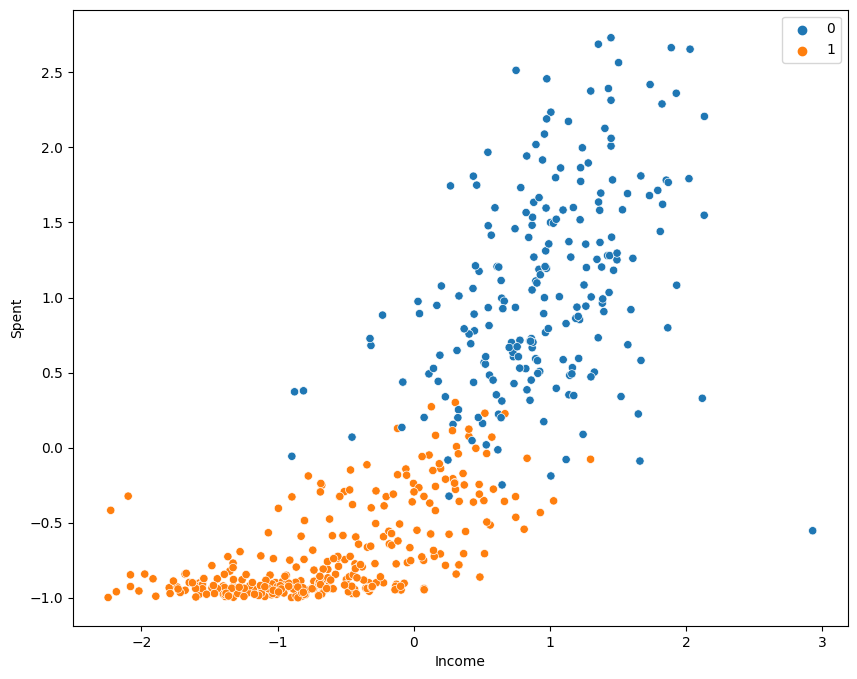

In [223]:
plt.figure(figsize=(10,8))
sns.scatterplot(data =scaled_tst_data, x = 'Income', y = 'Spent', hue = km_eans.labels_)

     cluster 0:lower income and lower expence
     cluster 1:higher income and higher expence

<Axes: xlabel='Spent', ylabel='Age'>

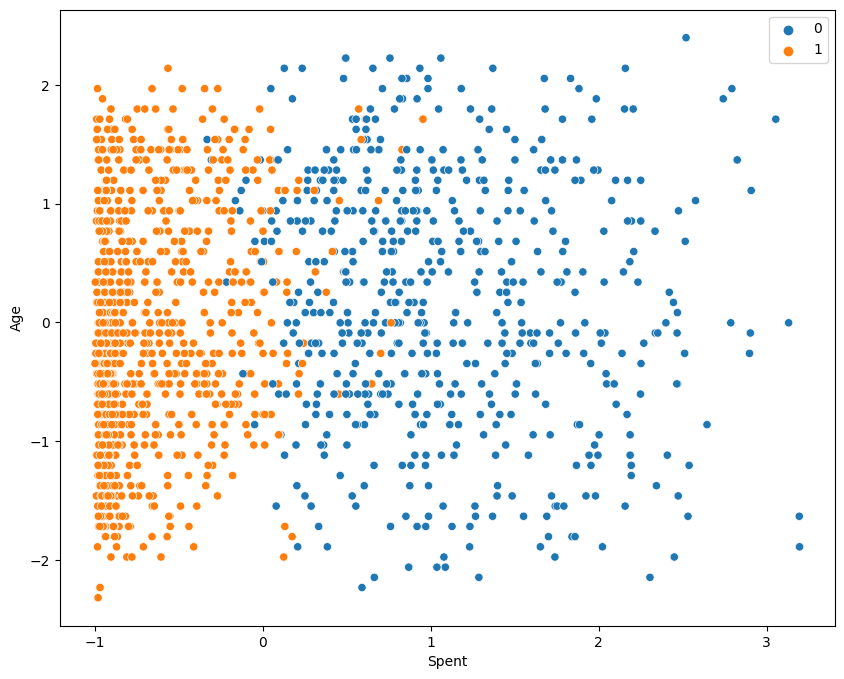

In [224]:
plt.figure(figsize=(10,8))
sns.scatterplot(data =scaled_trn_data, x ='Spent', y =  'Age', hue = kmeans.labels_)

<Axes: xlabel='Spent', ylabel='Age'>

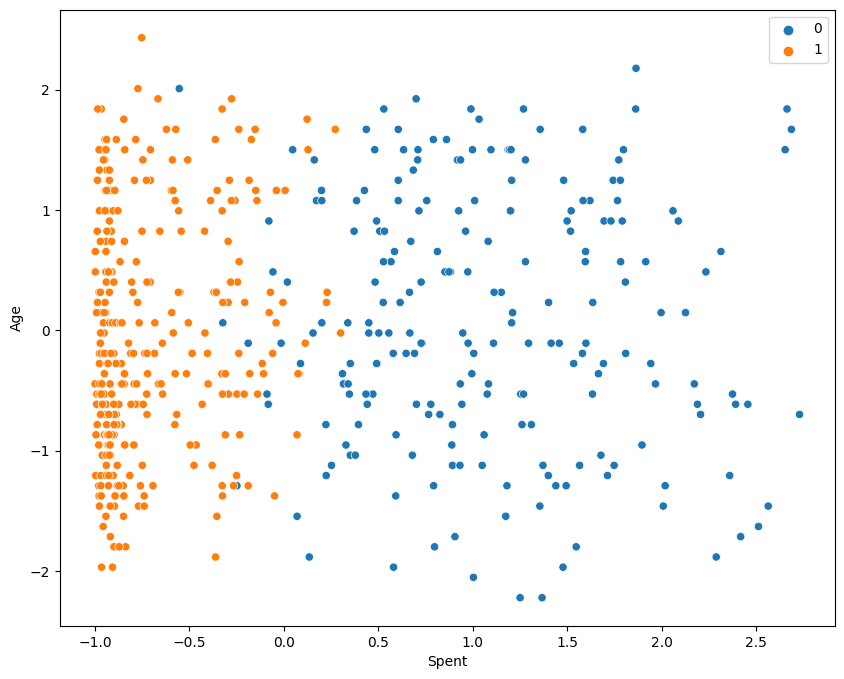

In [225]:
plt.figure(figsize=(10,8))
sns.scatterplot(data =scaled_tst_data, x ='Spent', y =  'Age', hue = km_eans.labels_)

Age did not affect the clustering

Text(0.5, 0, 'Number Of Total Accepted Promotions')

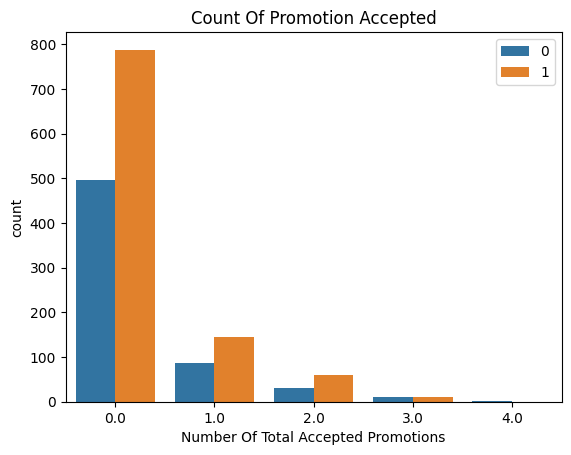

In [226]:
pl = sns.countplot(x=scaled_trn_data["total_accptd_camp"],hue=kmeans.labels_)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")

Text(0.5, 0, 'Number Of Total Accepted Promotions')

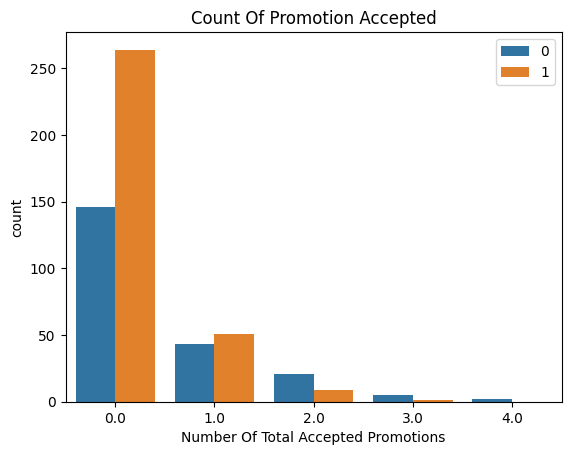

In [227]:
pl = sns.countplot(x=scaled_tst_data["total_accptd_camp"],hue=km_eans.labels_)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")

There isnt any overwhelming response to the campaigns so far. There are only a few participants overall. Moreover, no one has taken part in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

<Axes: xlabel='Children', ylabel='Spent'>

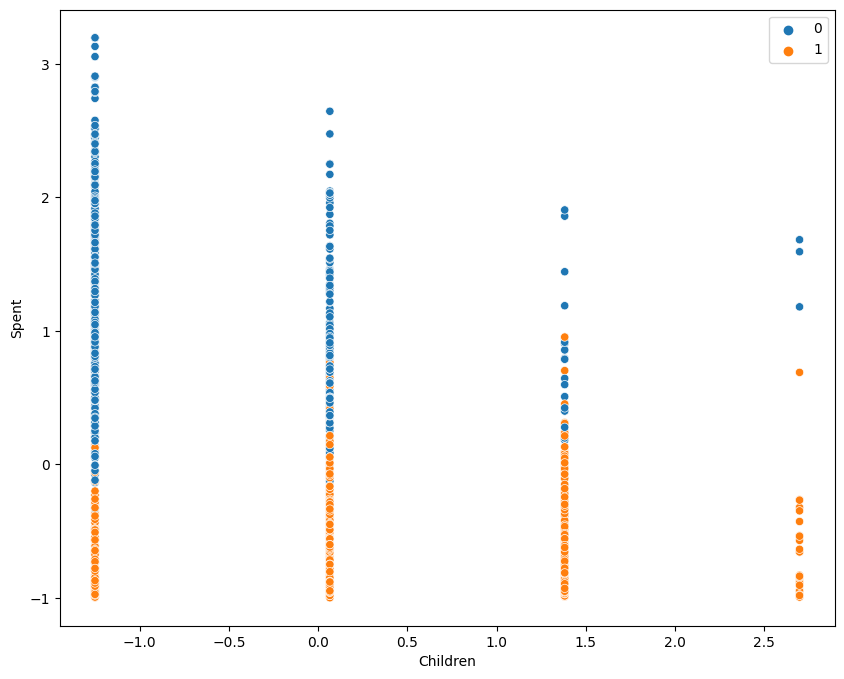

In [228]:
plt.figure(figsize=(10,8))
sns.scatterplot(data =scaled_trn_data, x ='Children', y = 'Spent', hue = kmeans.labels_)

<Axes: xlabel='Spent', ylabel='Children'>

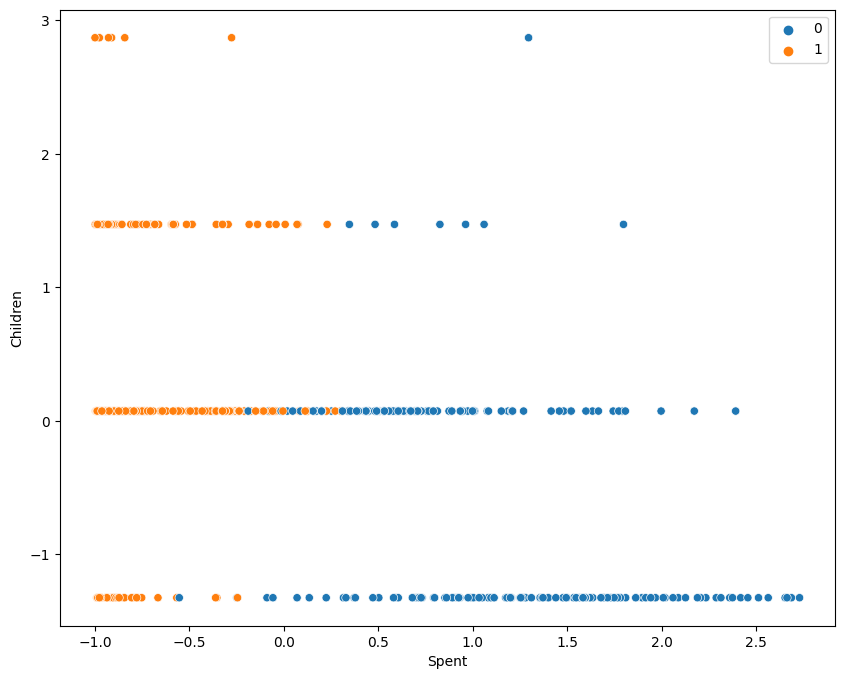

In [229]:
plt.figure(figsize=(10,8))
sns.scatterplot(data =scaled_tst_data, x ='Spent', y =  'Children', hue = km_eans.labels_)

<Axes: xlabel='Spent', ylabel='NumCatalogPurchases'>

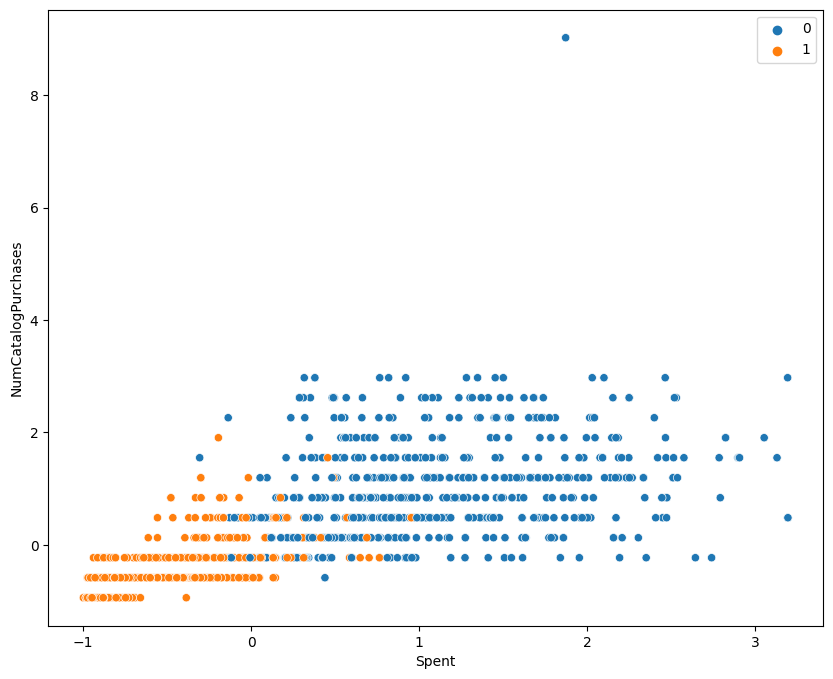

In [230]:
plt.figure(figsize=(10,8))
sns.scatterplot(data =scaled_trn_data, x ='Spent', y =  'NumCatalogPurchases', hue = kmeans.labels_)

<Axes: xlabel='Spent', ylabel='NumCatalogPurchases'>

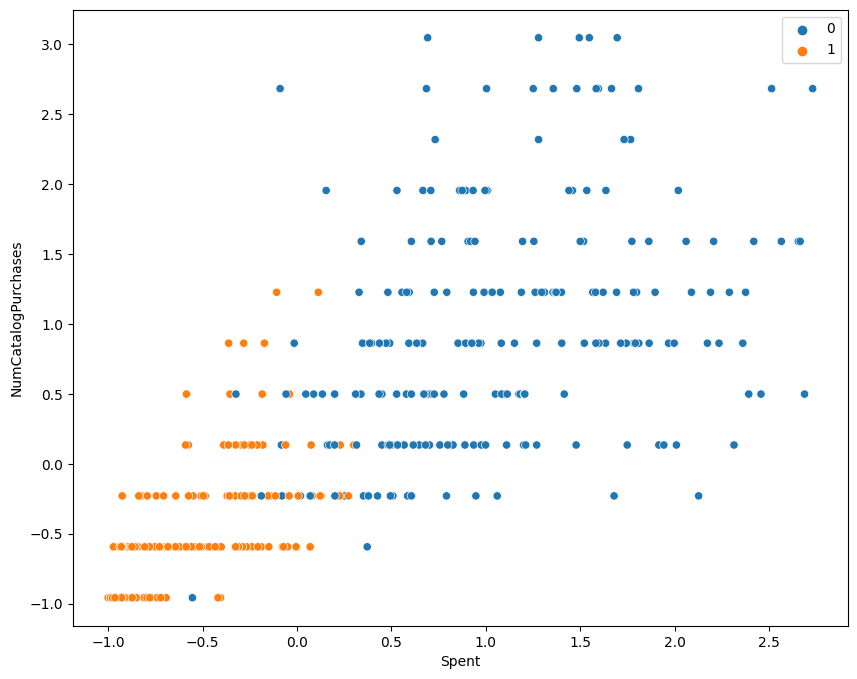

In [231]:
plt.figure(figsize=(10,8))
sns.scatterplot(data =scaled_tst_data, x ='Spent', y =  'NumCatalogPurchases', hue = km_eans.labels_)

    cluster 0:spent less through purchase using catalog
    cluster 1:spent high amount through purchase using catalog

<Axes: xlabel='Spent', ylabel='NumDealsPurchases'>

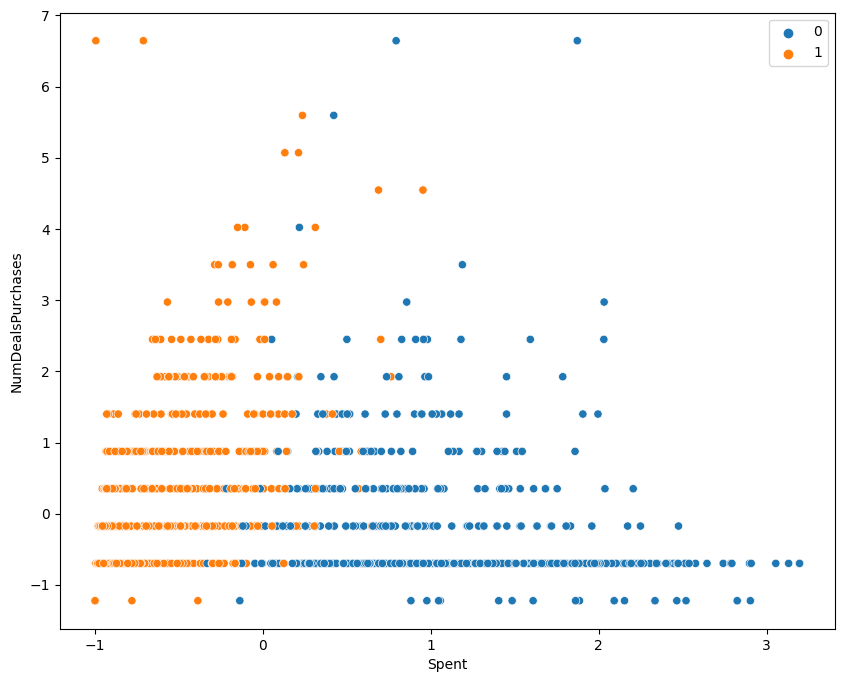

In [232]:
plt.figure(figsize=(10,8))
sns.scatterplot(data =scaled_trn_data, x ='Spent', y =  'NumDealsPurchases', hue = kmeans.labels_)

<Axes: xlabel='Spent', ylabel='NumDealsPurchases'>

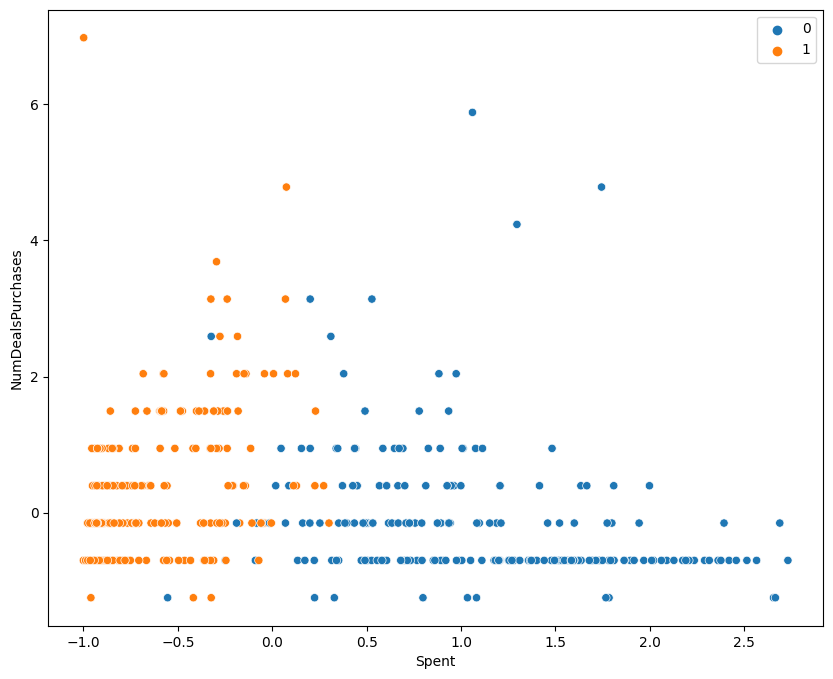

In [233]:
plt.figure(figsize=(10,8))
sns.scatterplot(data =scaled_tst_data, x ='Spent', y =  'NumDealsPurchases', hue = km_eans.labels_)

does not affect the clustering

<Axes: xlabel='Spent', ylabel='NumDealsPurchases'>

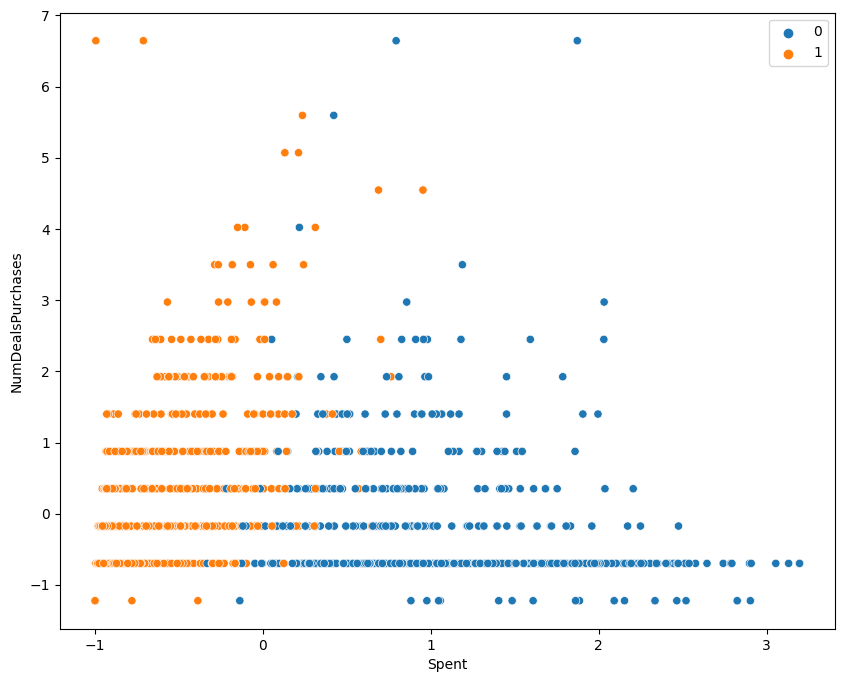

In [234]:
plt.figure(figsize=(10,8))
sns.scatterplot(data =scaled_trn_data, x ='Spent', y =  'NumDealsPurchases', hue = kmeans.labels_)

<Axes: xlabel='Spent', ylabel='NumStorePurchases'>

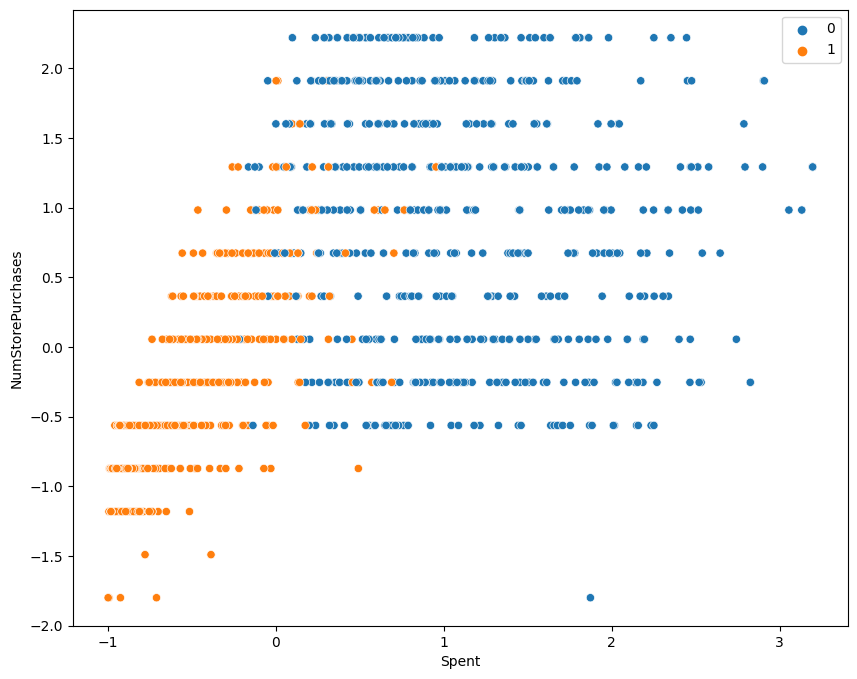

In [235]:
plt.figure(figsize=(10,8))
sns.scatterplot(data =scaled_trn_data, x ='Spent', y =  'NumStorePurchases', hue = kmeans.labels_)

<Axes: xlabel='Spent', ylabel='NumStorePurchases'>

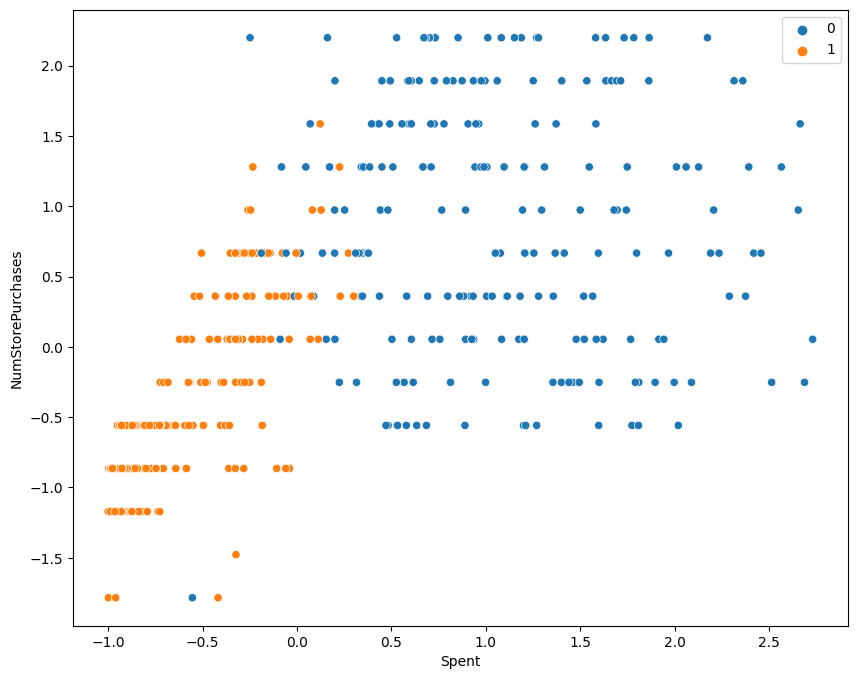

In [236]:
plt.figure(figsize=(10,8))
sns.scatterplot(data =scaled_tst_data, x ='Spent', y =  'NumStorePurchases', hue = km_eans.labels_)

purchasing via store doesnot affect the clustering

<Axes: xlabel='Spent', ylabel='NumWebPurchases'>

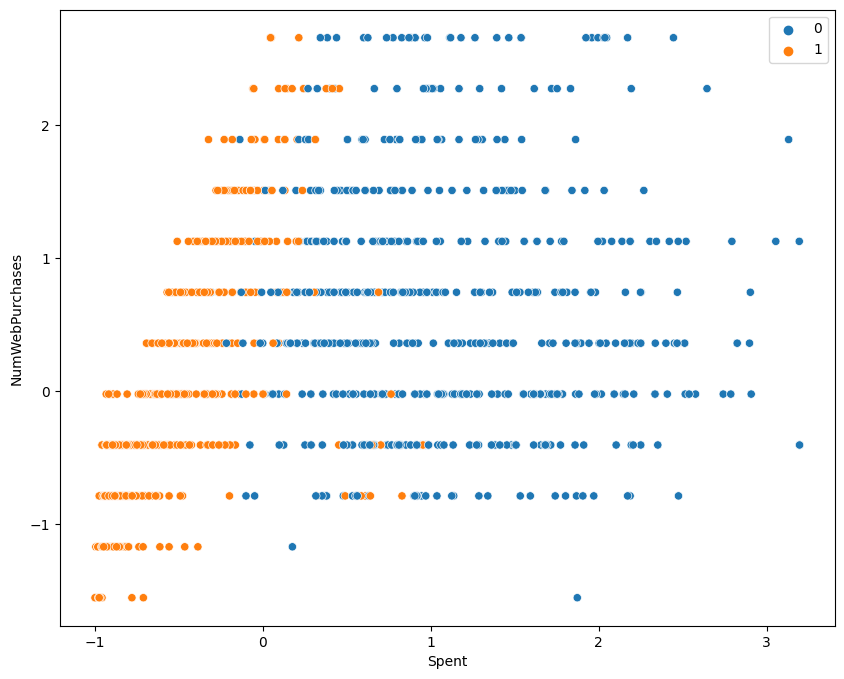

In [237]:
plt.figure(figsize=(10,8))
sns.scatterplot(data =scaled_trn_data, x ='Spent', y =  'NumWebPurchases', hue = kmeans.labels_)

purchasing via webpage doesnot affect the clustering

the clustering is mostly based on Income,total expences,purchase using catalog.campaign,number of children and age doesnot affect the clustering

In [240]:
#agglomarative clustering
#Initiating the Agglomerative Clustering model with k=4
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=2)

# fit model and predict clusters
trn_AC = AC.fit_predict(scaled_trn_data)
scaled_trn_data["Clusters"] = trn_AC


print(trn_AC)

[0 1 0 ... 1 1 1]


In [243]:


test_AC = AC.fit_predict(scaled_tst_data)
scaled_tst_data["Clusters"] = test_AC


Text(0.5, 1.0, 'Distribution Of The Clusters for train data')

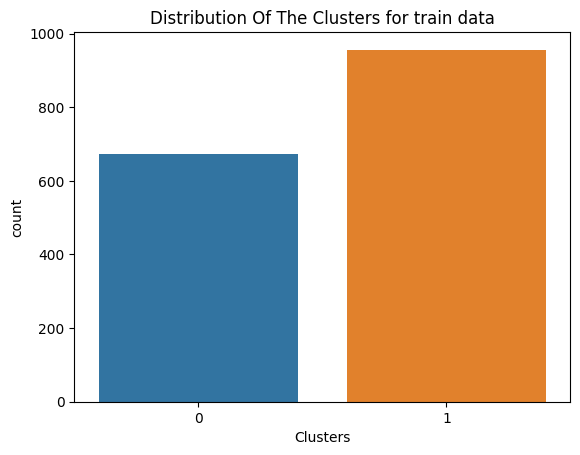

In [244]:
pl = sns.countplot(x=scaled_trn_data["Clusters"])
pl.set_title("Distribution Of The Clusters for train data")